<a href="https://www.kaggle.com/code/faizahmadnadhif/mobile-sales?scriptVersionId=190400131" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

/kaggle/input/mobile-sales-dataset/mobile_sales.csv


In [14]:
#read the csv files
import pandas as pd
df = pd.read_csv('/kaggle/input/mobile-sales-dataset/mobile_sales.csv')

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,Online
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,Credit Card
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,Online
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,Cash
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,Online
...,...,...,...,...,...,...,...,...,...,...,...
995,41f08915-addb-4966-8628-038c479c619a,2024-01-28,challenge,Brooks Ltd,1386.69,76,28865.70,39,Male,Ronaldchester,Credit Card
996,bcfa1912-5bd8-4894-900f-376fa48f022d,2024-07-13,least,"Lang, Brown and Stone",1159.26,59,50471.42,21,Other,West Jenniferport,Credit Card
997,e6839305-a177-4cda-aada-3ac1f49eeeec,2024-01-13,enjoy,"Atkinson, Moore and Nelson",544.31,59,1381.82,26,Female,Barneschester,Credit Card
998,12f7ac32-9063-4ae5-a122-385b06ba77af,2024-01-25,half,"Kim, Maxwell and Moore",331.98,84,8557.32,20,Male,Jonesborough,Online


In [16]:
df.head()

,TransactionID,Date,MobileModel,Brand,Price,UnitsSold,TotalRevenue,CustomerAge,CustomerGender,Location,PaymentMethod
0,79397f68-61ed-4ea8-bcb2-f918d4e6c05b,2024-01-06,direction,Green Inc,1196.95,85,28002.80,32,Female,Port Erik,3
1,4f87d114-f522-4ead-93e3-f336402df6aa,2024-04-05,right,Thomas-Thompson,1010.34,64,2378.82,55,Female,East Linda,1
2,6750b7d6-dcc5-48c5-a76a-b6fc9d540fe1,2024-02-13,summer,Sanchez-Williams,400.80,95,31322.56,57,Male,East Angelicastad,3
3,7da7de95-f772-4cc2-bce0-b0873f98233e,2024-04-17,keep,Greer and Sons,338.60,79,31159.75,46,Other,East Kevin,0
4,469044af-0d60-4d87-af66-c6603e844057,2024-06-02,option,Brown and Sons,839.79,41,11523.36,38,Male,New Lindaborough,3


In [18]:
column_names = df.columns

In [19]:
columns_df = pd.DataFrame(column_names, columns=["Column Names"])

In [20]:
columns_df

,Column Names
0,TransactionID
1,Date
2,MobileModel
3,Brand
4,Price
5,UnitsSold
6,TotalRevenue
7,CustomerAge
8,CustomerGender
9,Location


In [21]:
print("Missing Value: ")
df.isnull().sum()

Missing Value: 


TransactionID     0
Date              0
MobileModel       0
Brand             0
Price             0
UnitsSold         0
TotalRevenue      0
CustomerAge       0
CustomerGender    0
Location          0
PaymentMethod     0
dtype: int64

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
print("Duplicated Values: ")
df.duplicated().sum()

Duplicated Values: 


0

In [25]:
print("Dataset Information: ")
df.info()

Dataset Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   1000 non-null   object 
 1   Date            1000 non-null   object 
 2   MobileModel     1000 non-null   object 
 3   Brand           1000 non-null   object 
 4   Price           1000 non-null   float64
 5   UnitsSold       1000 non-null   int64  
 6   TotalRevenue    1000 non-null   float64
 7   CustomerAge     1000 non-null   int64  
 8   CustomerGender  1000 non-null   object 
 9   Location        1000 non-null   object 
 10  PaymentMethod   1000 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [26]:
print("Statistic: ")
df.describe()

Statistic: 


,Price,UnitsSold,TotalRevenue,CustomerAge,PaymentMethod
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,807.512970,50.074000,40218.445040,41.141000,1.547000
std,402.489878,28.616804,32715.290358,13.528346,1.095898
min,103.320000,1.000000,116.850000,18.000000,0.000000
25%,458.037500,25.000000,13316.037500,29.000000,1.000000
50%,823.730000,51.000000,30860.655000,41.000000,2.000000
75%,1157.875000,75.000000,60770.435000,53.000000,3.000000
max,1499.250000,99.000000,141411.840000,64.000000,3.000000


In [ ]:
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())

In [28]:
df['MobileModel'].value_counts()

MobileModel
many       5
service    5
eat        4
believe    4
mouth      4
          ..
see        1
listen     1
policy     1
change     1
memory     1
Name: count, Length: 637, dtype: int64

In [29]:
df['Brand'].value_counts()

Brand
Martinez Ltd                   3
Sanchez PLC                    3
Ramos and Sons                 2
Williams Group                 2
Miller and Sons                2
                              ..
Jackson, Collier and Barber    1
Perez and Sons                 1
Ayers and Sons                 1
Holland PLC                    1
Kim, Maxwell and Moore         1
Name: count, Length: 980, dtype: int64

<Axes: >

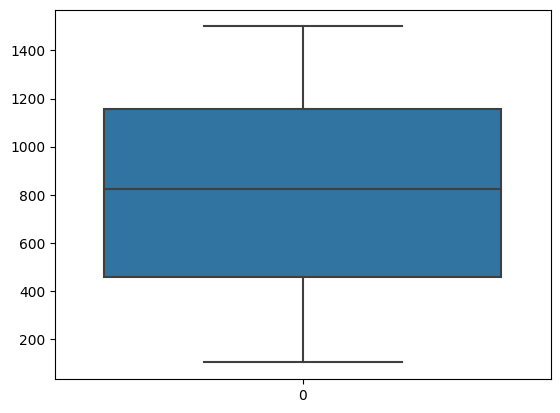

In [30]:
sns.boxplot(df['Price']) 

<Axes: >

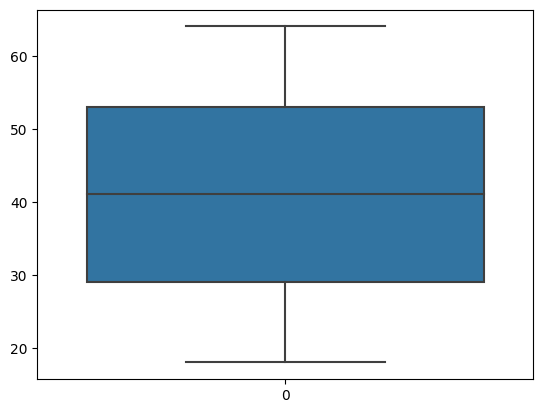

In [31]:
sns.boxplot(df['CustomerAge'])

In [32]:
df['UnitsSold'].head()

0    85
1    64
2    95
3    79
4    41
Name: UnitsSold, dtype: int64

In [33]:
df['UnitsSold'].describe()

count    1000.000000
mean       50.074000
std        28.616804
min         1.000000
25%        25.000000
50%        51.000000
75%        75.000000
max        99.000000
Name: UnitsSold, dtype: float64

In [34]:
df['UnitsSold'].unique()

array([85, 64, 95, 79, 41, 70, 63, 58, 92, 22, 21, 49, 45, 76, 10, 97, 65,
       11, 60, 54, 71, 56,  4, 87, 51, 43, 19, 98, 35, 62, 38, 89, 67, 68,
       59,  6, 14, 66, 34, 61, 78, 26, 52,  2, 33, 25, 15, 77, 23, 37, 93,
       39, 75, 99, 94,  3, 17, 81,  1, 28, 46, 20, 32, 16, 50, 96, 40,  9,
       47, 13, 29,  5, 31, 83, 42, 90, 73,  7, 18, 27, 80, 84,  8, 53, 72,
       74, 55, 82, 36, 91, 24, 57, 86, 48, 12, 88, 69, 44, 30])

In [35]:
df['UnitsSold'].value_counts()

SyntaxError: incomplete input (63777806.py, line 1)

<Axes: >

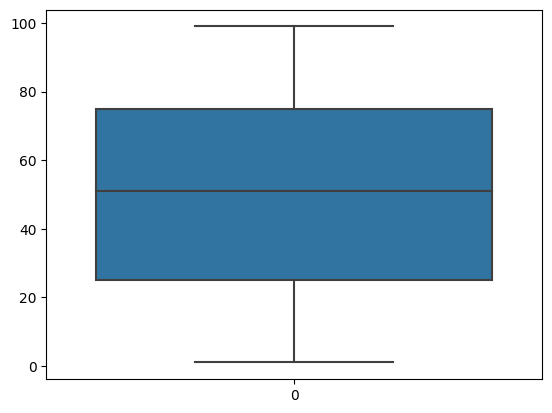

In [36]:
sns.boxplot(df['UnitsSold'])

<Axes: >

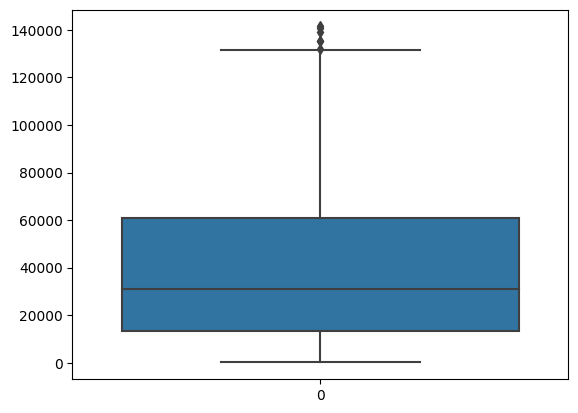

In [37]:
sns.boxplot(df['TotalRevenue'])

<Axes: xlabel='CustomerGender'>

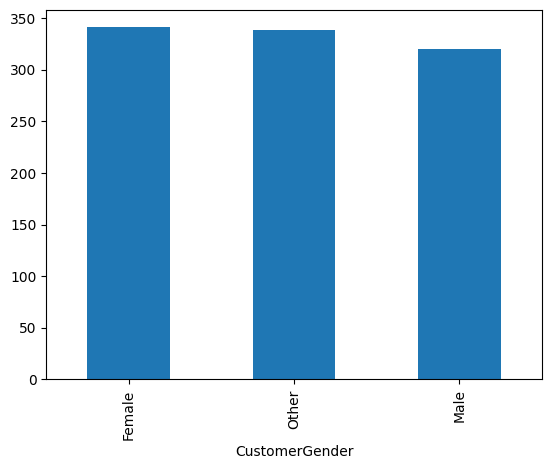

In [38]:
df['CustomerGender'].value_counts().plot(kind = 'bar')

<Axes: >

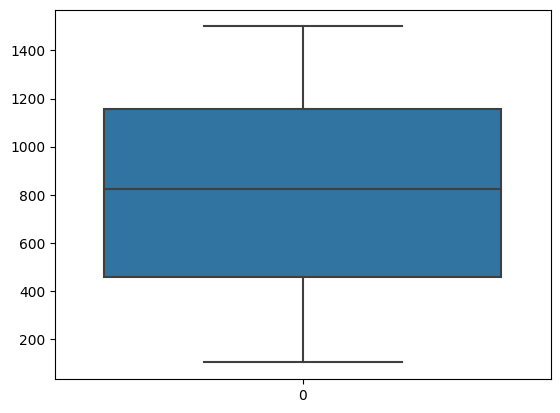

In [39]:
sns.boxplot(df['Price'])

In [40]:
df['PaymentMethod'].value_counts()

PaymentMethod
1    278
3    259
2    246
0    217
Name: count, dtype: int64

In [42]:
# Encode the target variable
label_encoder = LabelEncoder()
df['PaymentMethod'] = label_encoder.fit_transform(df['PaymentMethod'])

# Split the data into training and test sets
X = df.drop(columns=['PaymentMethod'])
y = df['PaymentMethod']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_features = ['Brand', 'CustomerGender']

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Decode the predictions back to the original labels if needed
y_test_decoded = label_encoder.inverse_transform(y_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

# Print decoded classification report
print("Decoded Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.25      0.63      0.35        78
           2       0.23      0.26      0.24        80
           3       0.33      0.03      0.05        77

    accuracy                           0.24       300
   macro avg       0.20      0.23      0.16       300
weighted avg       0.21      0.24      0.17       300

Decoded Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.25      0.63      0.35        78
           2       0.23      0.26      0.24        80
           3       0.33      0.03      0.05        77

    accuracy                           0.24       300
   macro avg       0.20      0.23      0.16       300
weighted avg       0.21      0.24      0.17       300

